# Ensemble Learning with Traditional ML Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import f1_score
import optuna

/var/folders/rt/yf3df5s52_589vft9vpfml9c0000gn/T/ipykernel_29905/880940295.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_train.npy")
X_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/X_valid.npy")
y_train = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_train.npy")
y_valid = np.load("data/Regular_processed/Without_Ordinal_Encoding/y_valid.npy")
X_test = np.load("data/Regular_Processed/Without_Ordinal_Encoding/X_test.npy")

for arr in [X_train, X_valid, y_train, y_valid, X_test]:
    print(arr.shape)

(988, 66)
(247, 66)
(988,)
(247,)
(824, 66)


# Loading Traditional ML Models

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=23, random_state=123, criterion='entropy', n_estimators=28)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 1.0
Valid F1 Score: 0.7449392712550608


In [4]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=123, criterion='gini', n_estimators=23)
random_forest_classifier.fit(X_train, y_train)
train_preds = random_forest_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = random_forest_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7601214574898786
Valid F1 Score: 0.7125506072874493


In [5]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_criterion = trial.suggest_categorical('rf_criterion', ['gini', 'entropy', 'log_loss'])
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 7, log=True)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 2, 50, log=True)
    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, random_state=123, criterion=rf_criterion)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score  # - abs((train_f1_score - valid_f1_score)/7)

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-04-06 13:18:16,279] A new study created in memory with name: no-name-467650e7-b219-4359-8c6e-0d155344b124
[I 2024-04-06 13:18:16,286] Trial 0 finished with value: 0.5425101214574899 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 4, 'rf_n_estimators': 2}. Best is trial 0 with value: 0.5425101214574899.
[I 2024-04-06 13:18:16,292] Trial 1 finished with value: 0.6558704453441295 and parameters: {'rf_criterion': 'entropy', 'rf_max_depth': 3, 'rf_n_estimators': 6}. Best is trial 1 with value: 0.6558704453441295.
[I 2024-04-06 13:18:16,297] Trial 2 finished with value: 0.5222672064777328 and parameters: {'rf_criterion': 'log_loss', 'rf_max_depth': 2, 'rf_n_estimators': 2}. Best is trial 1 with value: 0.6558704453441295.
[I 2024-04-06 13:18:16,301] Trial 3 finished with value: 0.6558704453441295 and parameters: {'rf_criterion': 'gini', 'rf_max_depth': 3, 'rf_n_estimators': 2}. Best is trial 1 with value: 0.6558704453441295.
[I 2024-04-06 13:18:16,311] Trial 4 finished wit

In [6]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.7125506072874493]
HyperParameters = {'rf_criterion': 'gini', 'rf_max_depth': 5, 'rf_n_estimators': 23}


### Bernoulli Naive Bayes

In [7]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)
train_preds = naive_bayes_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = naive_bayes_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6973684210526315
Valid F1 Score: 0.6680161943319838


### Nearest Centroid

In [8]:
from sklearn.neighbors import NearestCentroid

nearest_centroid_classifier = NearestCentroid(metric='correlation')
nearest_centroid_classifier.fit(X_train, y_train)
train_preds = nearest_centroid_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = nearest_centroid_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.6589068825910931
Valid F1 Score: 0.6720647773279352


/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


In [9]:
def objective(trial):
    # Suggest values for the hyperparameters using a trial object.
    rf_metric = trial.suggest_categorical('rf_metric', ['hamming', 'cosine', 'euclidean', 'yule', 'russellrao', 'jaccard', 'chebyshev',
                                                        'sokalmichener', 'sqeuclidean', 'matching', 'rogerstanimoto', 'nan_euclidean',
                                                        'dice', 'sokalsneath', 'correlation', 'canberra', 'manhattan', 'braycurtis'])
    classifier_obj = NearestCentroid(metric=rf_metric)
    classifier_obj.fit(X_train, y_train)
    train_preds = classifier_obj.predict(X_train)
    train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
    valid_preds_optuna = classifier_obj.predict(X_valid)
    valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds_optuna, average='micro')
    
    return valid_f1_score

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-04-06 13:18:18,442] A new study created in memory with name: no-name-53d9a6ea-5db7-484c-a190-d9ee1112d408
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10

In [10]:
print(f"Best Trial\nValid Micro Averaged F1 Score: {study.best_trial.values}\nHyperParameters = {study.best_trial.params}")

Best Trial
Valid Micro Averaged F1 Score: [0.6720647773279352]
HyperParameters = {'rf_metric': 'correlation'}


# Ensemble Learning

In [11]:
estimator_dict = {
    'random_forest': random_forest_classifier,
    'nearest_centroid': nearest_centroid_classifier,
    'bernoulli_naive_bayes': naive_bayes_classifier
}
estimators = list(estimator_dict.items())

### Analysis of Models

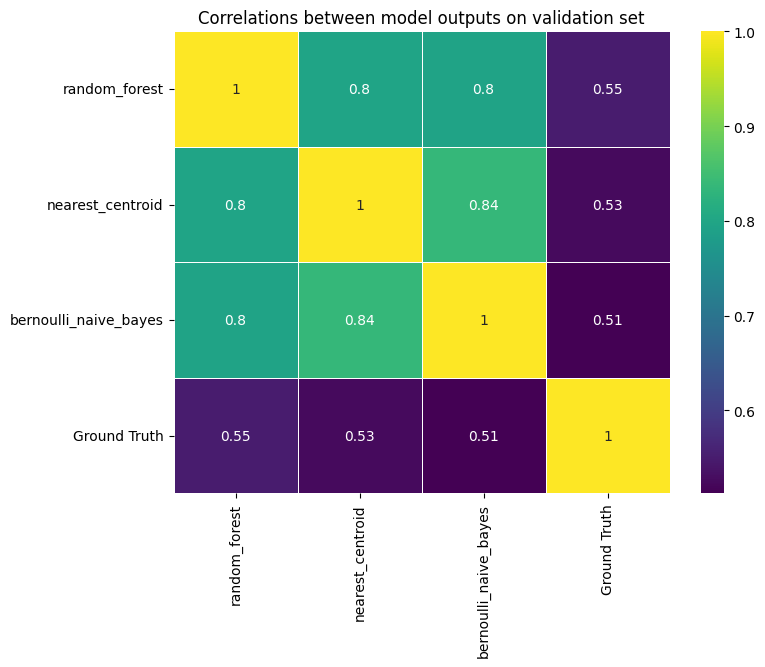

In [12]:
val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)
val_preds_df['Ground Truth'] = y_valid

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(val_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on validation set")
plt.show()

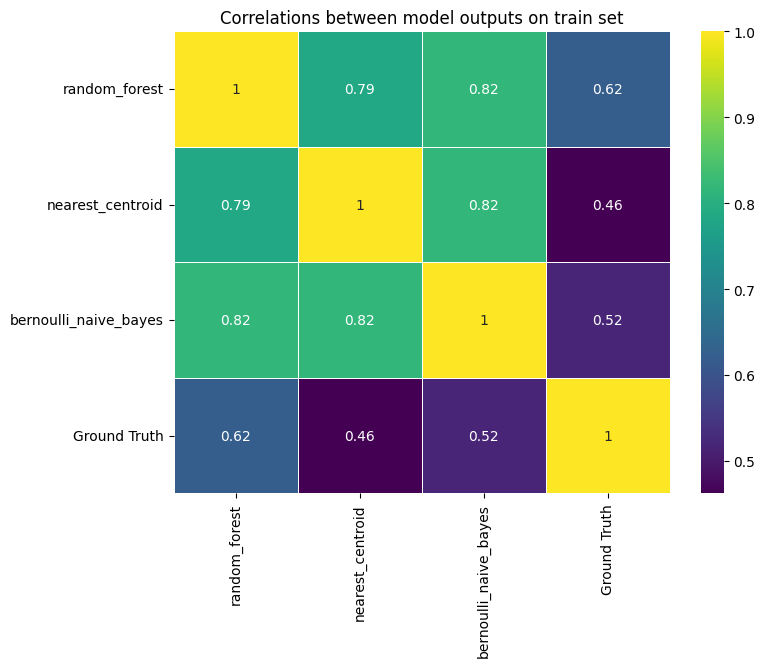

In [13]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)
train_preds_df['Ground Truth'] = y_train

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(train_preds_df.corr(), cmap = 'viridis', annot=True, linewidths=.5)
plt.title("Correlations between model outputs on train set")
plt.show()

### Voting Classifier

In [14]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=estimators, voting='hard', weights=[3, 2, 1])
voting_classifier.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7317813765182186
Valid F1 Score: 0.7004048582995951


/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(


### Stacking Classifier

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
clf.fit(X_train, y_train)

train_preds = voting_classifier.predict(X_train)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = voting_classifier.predict(X_valid)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')
print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7317813765182186
Valid F1 Score: 0.7004048582995951


/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:201: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_centroid.py:150: FutureWarning: Support for distance metrics other than euclidean and manhattan and for callables was deprecated in version 1.3 and will be removed in version 1.5.
  warnings.warn(
/Users/harshraod/miniconda3/envs/MachineLearningProject/lib/python3.10/site-packages/sklearn/neighbors/_nearest_cent

### Custom Ensemble using Decision Tree & Some inputs columns

In [21]:
train_preds_df = pd.DataFrame()
for name, model in estimators:
    train_preds_df[name] = model.predict(X_train)

val_preds_df = pd.DataFrame()
for name, model in estimators:
    val_preds_df[name] = model.predict(X_valid)

test_preds_df = pd.DataFrame()
for name, model in estimators:
    test_preds_df[name] = model.predict(X_test)

train_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/train_processed.csv")
valid_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/valid_processed.csv")
test_df = pd.read_csv("data/Regular_Processed/Without_Ordinal_Encoding/test_processed.csv")

FEATURE_NAMES_TO_ADD = ['total_protein', 'nasogastric_reflux_ph', 'packed_cell_volume', 'abdomo_protein', 'respiratory_rate', 'pain_is_extreme_pain']
for feature in FEATURE_NAMES_TO_ADD:
    train_preds_df[feature] = train_df[feature]
    val_preds_df[feature] = valid_df[feature]
    test_preds_df[feature] = test_df[feature]

X_train_with_preds = train_preds_df.to_numpy()
X_valid_with_preds = val_preds_df.to_numpy()
X_test_with_preds = test_preds_df.to_numpy()

print(f"X_train_with_preds shape: {X_train_with_preds.shape}\nX_valid_with_preds shape: {X_valid_with_preds.shape}\nX_test_with_preds shape: {X_test_with_preds.shape}")

X_train_with_preds shape: (988, 9)
X_valid_with_preds shape: (247, 9)
X_test_with_preds shape: (824, 9)


In [17]:
from sklearn.tree import DecisionTreeClassifier

final_classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3, splitter='best')
final_classifier.fit(X_train_with_preds, y_train)

train_preds = final_classifier.predict(X_train_with_preds)
train_f1_score = f1_score(y_true=y_train, y_pred=train_preds, average='micro')
valid_preds = final_classifier.predict(X_valid_with_preds)
valid_f1_score = f1_score(y_true=y_valid, y_pred=valid_preds, average='micro')

print(f"Train F1 Score: {train_f1_score}\nValid F1 Score: {valid_f1_score}")

Train F1 Score: 0.7641700404858299
Valid F1 Score: 0.7125506072874493


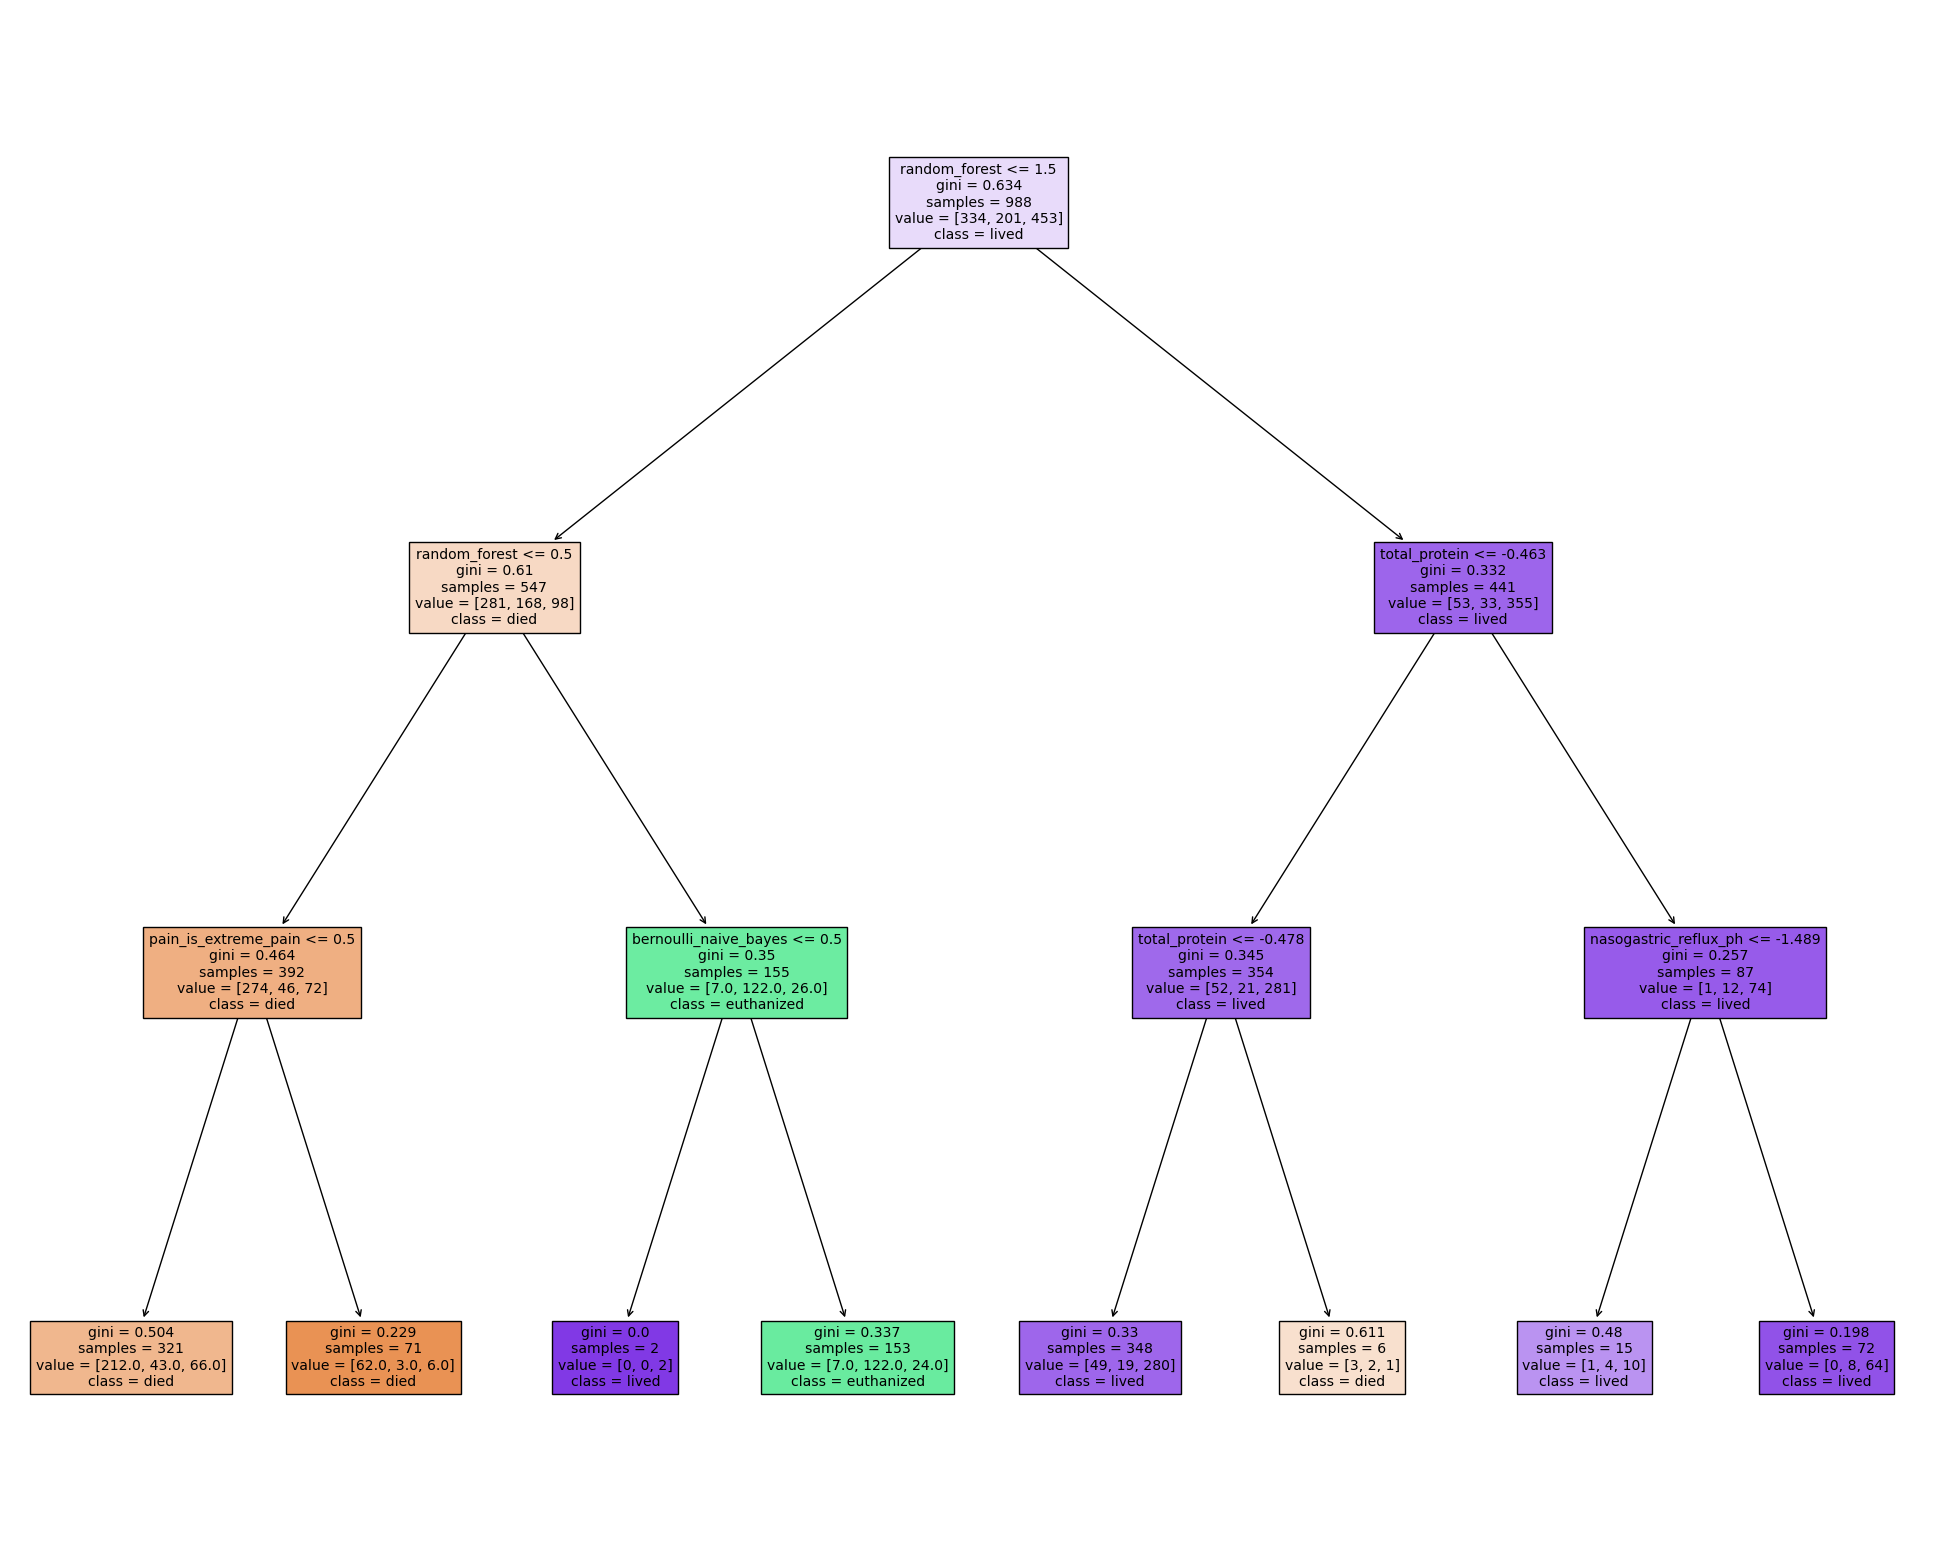

In [18]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_classifier, 
                   feature_names=list(train_preds_df.columns),  
                   class_names=['died', 'euthanized', 'lived'],
                   filled=True)

In [22]:
test_preds = final_classifier.predict(X_test_with_preds)

In [25]:
PRED_CATEGORIES = ['died', 'euthanized', 'lived']
pred_list = [PRED_CATEGORIES[el] for el in test_preds]

submission_df = pd.DataFrame()
df_test_raw = pd.read_csv("data/test.csv")
submission_df['id'] = df_test_raw['id']
submission_df['outcome'] = pred_list

In [28]:
submission_df.to_csv("submissions/Without_Ordinal_Encoding/DecisionTree_Ensemble_3_RandomForest_NearestCentroid_NaiveBayes_Submission.csv", index=False)